In [2]:
import pandas

In [3]:
dataset = pandas.read_csv('Hotel_Reviews.csv')
dataset.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [4]:
dataset['word_count'] = dataset['Negative_Review'].apply(lambda x: len(str(x).split(" ")))
dataset[['Negative_Review','word_count']].head()

,Negative_Review,word_count
0,I am so angry that i made this post available...,397
1,No Negative,2
2,Rooms are nice but for elderly a bit difficul...,42
3,My room was dirty and I was afraid to walk ba...,210
4,You When I booked with your company on line y...,140


In [5]:
dataset.word_count.describe()

count    515738.000000
mean         19.035384
std          29.392220
min           1.000000
25%           2.000000
50%           9.000000
75%          23.000000
max         408.000000
Name: word_count, dtype: float64

In [6]:
freq = pandas.Series(' '.join(dataset['Negative_Review']).split()).value_counts()[:20]
freq

the         423240
was         234097
to          227172
a           219587
and         215427
in          164076
room        155018
No          154106
Negative    127907
of          120184
for         114282
not         112716
I           111948
The         106894
it           88774
is           81738
we           73629
t            72247
but          70515
very         69279
dtype: int64

In [7]:
freq1 =  pandas.Series(' '.join(dataset['Negative_Review']).split()).value_counts()[-20:]
freq1

greaat          1
expensisve      1
sauasages       1
everyroom       1
Imcompetence    1
caramelise      1
humdrum         1
0001            1
fundamentals    1
dean            1
receptioner     1
Padington       1
readu           1
Randall         1
perishable      1
Dstrikt         1
gtood           1
unfunny         1
JL              1
apparantely     1
dtype: int64

In [8]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()
stem = PorterStemmer()
word = "inversely"
print("stemming:",stem.stem(word))
print("lemmatization:", lem.lemmatize(word, "v"))

stemming: invers
lemmatization: inversely


In [9]:
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
#nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer

In [10]:
##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))

In [11]:
corpus = []
for i in range(0, 515730):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', dataset['Negative_Review'][i])
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()    
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in stop_words] 
    text = " ".join(text)
    corpus.append(text)

In [12]:
corpus[100]

'building work starting waking u mention building work booking com hotel web page say renovation would noise disturbance also air conditioning loud'

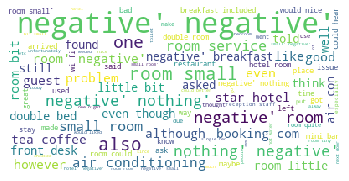

In [13]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

In [15]:
list(cv.vocabulary_.keys())[:10]

['angry',
 'made',
 'post',
 'available',
 'via',
 'possible',
 'site',
 'use',
 'trip',
 'one']

[Text(0, 0, 'room'),
 Text(0, 0, 'negative'),
 Text(0, 0, 'hotel'),
 Text(0, 0, 'breakfast'),
 Text(0, 0, 'small'),
 Text(0, 0, 'staff'),
 Text(0, 0, 'nothing'),
 Text(0, 0, 'bed'),
 Text(0, 0, 'would'),
 Text(0, 0, 'could'),
 Text(0, 0, 'one'),
 Text(0, 0, 'night'),
 Text(0, 0, 'bathroom'),
 Text(0, 0, 'bit'),
 Text(0, 0, 'time'),
 Text(0, 0, 'little'),
 Text(0, 0, 'like'),
 Text(0, 0, 'shower'),
 Text(0, 0, 'good'),
 Text(0, 0, 'day')]

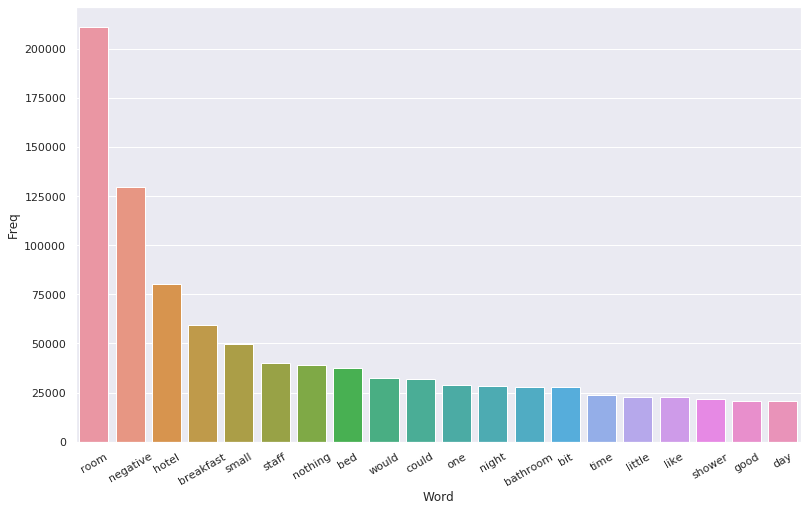

In [16]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]

#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pandas.DataFrame(top_words)
top_df.columns=["Word", "Freq"]

#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

In [17]:
corpus = []
for i in range(0, 515730):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', dataset['Negative_Review'][i])
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()    
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text] 
    text = " ".join(text)
    corpus.append(text)

[('room wa', 32869),
 ('breakfast wa', 11012),
 ('small room', 6980),
 ('bed wa', 6813),
 ('wa bit', 6626),
 ('room service', 6334),
 ('air conditioning', 5525),
 ('star hotel', 5403),
 ('wa little', 5377),
 ('booking com', 4586),
 ('hotel wa', 4156),
 ('bathroom wa', 4006),
 ('wa quite', 3345),
 ('everything wa', 3271),
 ('air con', 3190),
 ('double bed', 3035),
 ('even though', 2971),
 ('wa small', 2935),
 ('front desk', 2900),
 ('little bit', 2767)]
             Bi-gram   Freq
0            room wa  32869
1       breakfast wa  11012
2         small room   6980
3             bed wa   6813
4             wa bit   6626
5       room service   6334
6   air conditioning   5525
7         star hotel   5403
8          wa little   5377
9        booking com   4586
10          hotel wa   4156
11       bathroom wa   4006
12          wa quite   3345
13     everything wa   3271
14           air con   3190
15        double bed   3035
16       even though   2971
17          wa small   2935
18        f

[Text(0, 0, 'room wa'),
 Text(0, 0, 'breakfast wa'),
 Text(0, 0, 'small room'),
 Text(0, 0, 'bed wa'),
 Text(0, 0, 'wa bit'),
 Text(0, 0, 'room service'),
 Text(0, 0, 'air conditioning'),
 Text(0, 0, 'star hotel'),
 Text(0, 0, 'wa little'),
 Text(0, 0, 'booking com'),
 Text(0, 0, 'hotel wa'),
 Text(0, 0, 'bathroom wa'),
 Text(0, 0, 'wa quite'),
 Text(0, 0, 'everything wa'),
 Text(0, 0, 'air con'),
 Text(0, 0, 'double bed'),
 Text(0, 0, 'even though'),
 Text(0, 0, 'wa small'),
 Text(0, 0, 'front desk'),
 Text(0, 0, 'little bit')]

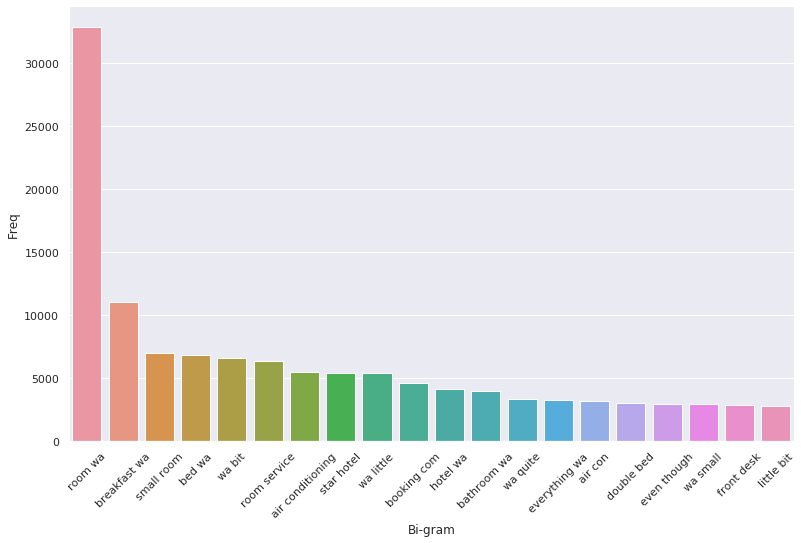

In [18]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2), max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    
    index = []
    for t in words_freq:
        if (t[0].partition(' ')[0] in stop_words) or (t[0].partition(' ')[-1] in stop_words):
            index.append(words_freq.index(t))
            

    for i in sorted(index, reverse = True):
        del words_freq[i]
        
    return words_freq[:n]

top2_words = get_top_n2_words(corpus, n=20)
from pprint import pprint
pprint(top2_words)
top2_df = pandas.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)

#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

In [47]:
corpus_trigram = []
for i in range(0, 515730):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', dataset['Negative_Review'][i])
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()    
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text] 
    text = " ".join(text)
    corpus_trigram.append(text)

In [48]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    index = []
    for t in words_freq:
        if (t[0].partition(' ')[0] in stop_words) or (t[0].partition(' ')[-1].partition(' ')[-1] in stop_words):
            index.append(words_freq.index(t))
            

    for i in sorted(index, reverse = True):
        del words_freq[i]
    return words_freq[:n]

                  Tri-gram  Freq
0            wa very small  3204
1          value for money  2122
2            room wa small  1728
3           wa not working  1687
4         would have liked  1622
5              room wa bit  1498
6           tea and coffee  1489
7           room wa little  1393
8             wa too small  1268
9          could be better  1212
10         room very small  1162
11           room which wa  1075
12         bottle of water  1042
13         member of staff  1034
14             wa not good  1014
15  coffee making facility   988
16              room it wa   984
17            wa very poor   977
18            room wa tiny   953
19           would be nice   949


[Text(0, 0, 'wa very small'), Text(0, 0, 'value for money'), Text(0, 0, 'room wa small'), Text(0, 0, 'wa not working'), Text(0, 0, 'would have liked'), Text(0, 0, 'room wa bit'), Text(0, 0, 'tea and coffee'), Text(0, 0, 'room wa little'), Text(0, 0, 'wa too small'), Text(0, 0, 'could be better'), Text(0, 0, 'room very small'), Text(0, 0, 'room which wa'), Text(0, 0, 'bottle of water'), Text(0, 0, 'member of staff'), Text(0, 0, 'wa not good'), Text(0, 0, 'coffee making facility'), Text(0, 0, 'room it wa'), Text(0, 0, 'wa very poor'), Text(0, 0, 'room wa tiny'), Text(0, 0, 'would be nice')]

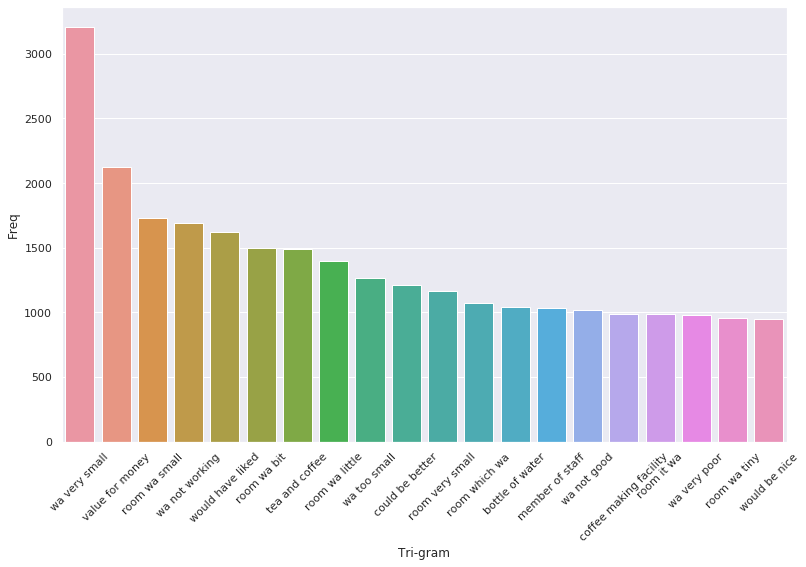

In [49]:
top3_words = get_top_n3_words(corpus_trigram, n=20)

top3_df = pandas.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)

#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

In [21]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)# get feature names
feature_names=cv.get_feature_names()
 
# fetch document for which keywords needs to be extracted
doc=corpus[100]
 
#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

In [22]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,5)
 
# now print the results
print("\nAbstract:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])


Abstract:
building work starting at am waking u up no mention of building work on booking com and on hotel web page it doe say renovation but not that there would be noise disturbance also air conditioning very very loud

Keywords:
building work 0.395
building 0.303
disturbance 0.254
work 0.252
booking com hotel 0.241


In [29]:
pprint((stop_words))

Pretty printing has been turned ON


In [31]:
from pprint import pprint
pprint(stop_words)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r